In [58]:
import gymnasium as gym
import matplotlib.pyplot as plt

In [3]:
gym.register('Custom-Blackjack', 'blackjack_bot.game:BlackJackEnv')

In [4]:
env = gym.make('Custom-Blackjack')

In [5]:
from blackjack.blackjack_gym import BlackJackEnv

game =  BlackJackEnv()

In [6]:
import numpy as np

In [7]:
game.reset()

{'Dealer': 9, 'PlayerCount': 21, 'PlayerAce': 1}

In [8]:
game.step(1)

({'Dealer': 9, 'PlayerCount': 14, 'PlayerAce': 1}, 0, False, False, {})

In [9]:
game.step(0)

({'Dealer': 9, 'PlayerCount': 14, 'PlayerAce': 1}, -1, True, False, {})

In [10]:
game.step(1)

({'Dealer': 9, 'PlayerCount': 23, 'PlayerAce': 1}, -1, True, False, {})

In [11]:
game.step(1)

({'Dealer': 9, 'PlayerCount': 28, 'PlayerAce': 1}, -1, True, False, {})

In [12]:
Q_table = np.zeros([14, 32, 2,2])

In [13]:
np.product(Q_table.shape)

1792

In [14]:
state = env.reset()

/Users/james/dev/blackjack-bot/.venv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:175: UserWarning: WARN: The default seed argument in `Env.reset` should be `None`, otherwise the environment will by default always be deterministic. Actual default: seed: Optional[int] = 0
  logger.warn(
/Users/james/dev/blackjack-bot/.venv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:181: DeprecationWarning: WARN: Current gymnasium version requires that `Env.reset` can be passed `options` to allow the environment initialisation to be passed additional information.
  logger.deprecation(
/Users/james/dev/blackjack-bot/.venv/lib/python3.10/site-packages/gymnasium/utils/passive_env_checker.py:189: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'dict'>`
  logger.warn(


In [15]:
Q_table.shape

(14, 32, 2, 2)

In [16]:
state

{'Dealer': 3, 'PlayerCount': 15, 'PlayerAce': 0}

In [17]:
Q_table[state['Dealer'], state['PlayerCount'], state['PlayerAce']]

array([0., 0.])

In [20]:
from tqdm import tqdm 

In [67]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1
num_episodes = 5_000_000

for num_episode in tqdm(range(num_episodes)):
    state = env.reset()
    done = False

    while not done:
        
        if np.random.rand() < epsilon:
            action = env.action_space.sample() # explore
        else:
            action_values = Q_table[state['Dealer'], state['PlayerCount'], state['PlayerAce']] 
            action = np.argmax(action_values)
        
        next_state, reward, done, info, _ = env.step(action)

        Q_table[state['Dealer'], state['PlayerCount'], state['PlayerAce'], action] = ((1-alpha) * action_values[action]) + (alpha * reward)
        
        state = next_state

100%|██████████| 5000000/5000000 [02:35<00:00, 32215.76it/s]


In [68]:
state = game.reset()
state

{'Dealer': 13, 'PlayerCount': 12, 'PlayerAce': 0}

In [69]:
Q_table[state['Dealer'], state['PlayerCount'], state['PlayerAce']]

array([-0.32034278, -0.44098059])

In [70]:
no_aces = Q_table[:,:,0,:]

In [71]:
aces = Q_table[:,:,1,:]

In [72]:
# if 
no_aces.shape

(14, 32, 2)

In [73]:
best_action_no_ace = np.argmax(no_aces, axis=2)

In [74]:
best_action_ace = np.argmax(aces, axis=2)

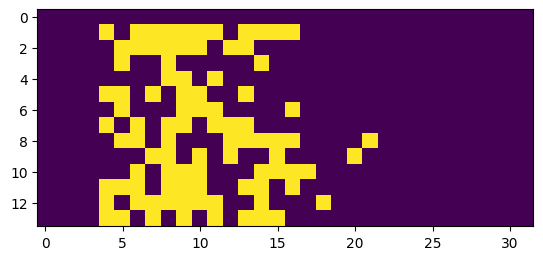

In [75]:
plt.imshow(best_action_no_ace)

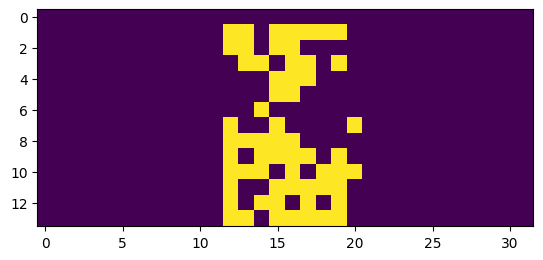

In [76]:
plt.imshow(best_action_ace)